<a href="https://colab.research.google.com/github/SIMA-SOIL/SIMA-SOIL/blob/main/Copy_of_Scaterdensity_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-51-bd21aab73638>:23: UserWarning: You passed a edgecolor/edgecolors ('face') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_density = ax.scatter(data['Observed SWC'], data['Simulated SWC'], c=data['Simulated SWC'], marker='x', cmap='viridis_r', alpha=0.7, s=20, edgecolor='face')
<ipython-input-51-bd21aab73638>:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


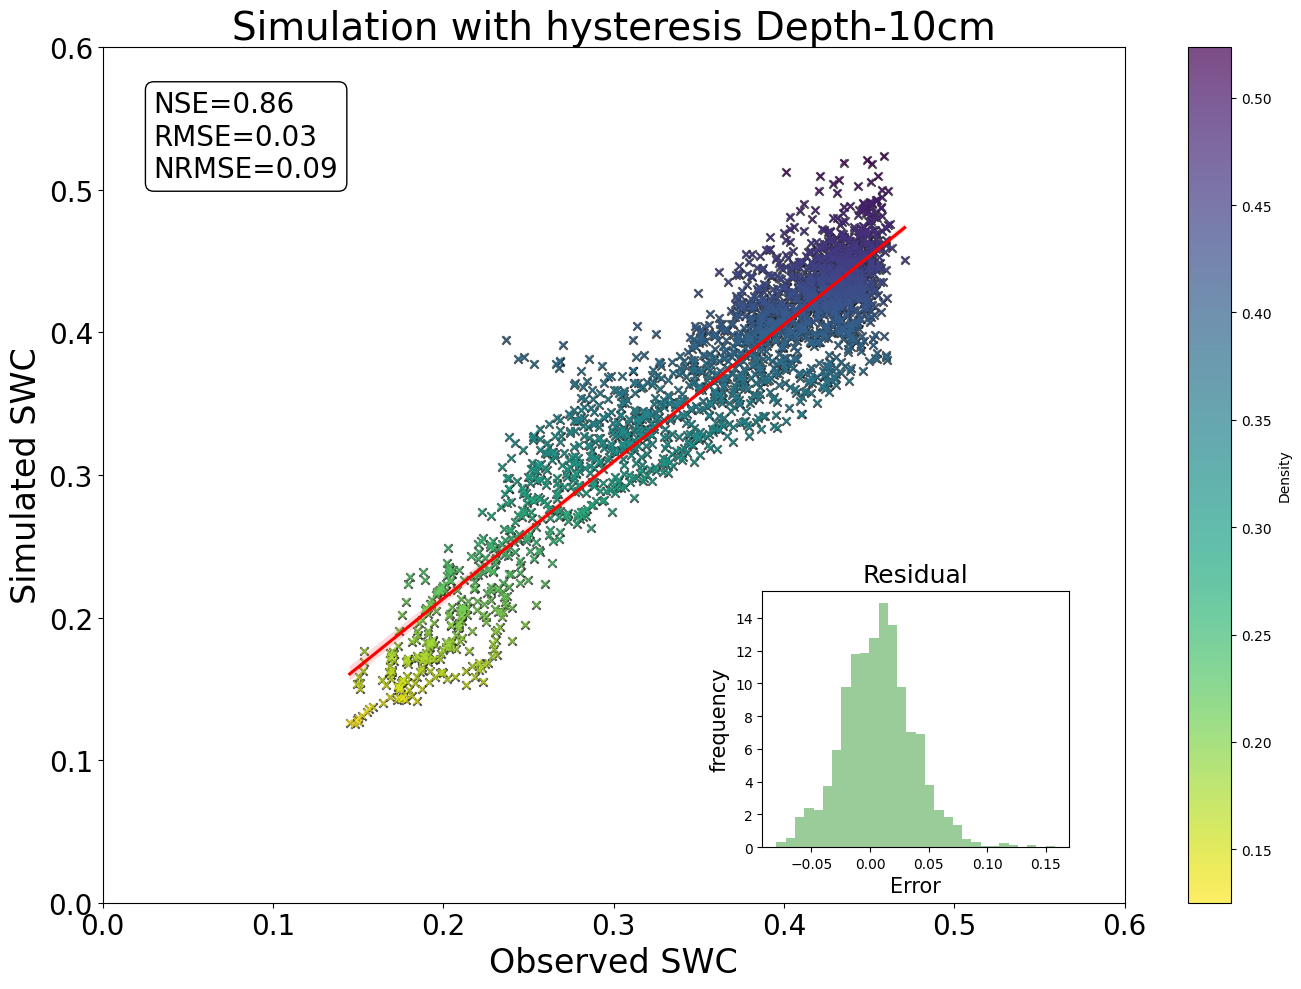

In [ ]:
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.metrics import mean_squared_error

# Assuming the functions nash_sutcliffe_efficiency and the dataframe 'data' are defined elsewhere

# Calculate residuals
data['Residuals'] = data['Simulated SWC'] - data['Observed SWC']

# Calculate metrics for the plots
rmse = np.sqrt(mean_squared_error(data['Observed SWC'], data['Simulated SWC']))
nse = nash_sutcliffe_efficiency(data['Observed SWC'], data['Simulated SWC'])
nrmse = rmse / np.mean(data['Observed SWC'])

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Scatter Plot with Density Heatmap
sns.regplot(x='Observed SWC', y='Simulated SWC', data=data, ax=ax, ci=99, marker="x", color=".1", line_kws=dict(color="r"))
scatter_density = ax.scatter(data['Observed SWC'], data['Simulated SWC'], c=data['Simulated SWC'], marker='x', cmap='viridis_r', alpha=0.7, s=20, edgecolor='face')
fig.colorbar(scatter_density, ax=ax, label='Density')
ax.set_title('Simulation with hysteresis Depth-10cm', fontsize=28)
ax.set_xlabel('Observed SWC', fontsize=24)
ax.set_ylabel('Simulated SWC', fontsize=24)
ax.set_xlim([0, 0.6])
ax.set_ylim([0, 0.6])
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)


# Histogram of Residuals (inset plot)
inset_hist = inset_axes(ax, width="30%", height="30%", loc='lower right', borderpad=4)
inset_hist.hist(data['Residuals'], bins=30, color='green', alpha=0.4, histtype='barstacked', density=True)
inset_hist.set_title('Residual', fontsize=18)
inset_hist.set_xlabel('Error', fontsize=15)
inset_hist.set_ylabel('frequency', fontsize=15)


# Annotations for NSE, RMSE, NRMSE
stats_text = f"NSE={nse:.2f}\nRMSE={rmse:.2f}\nNRMSE={nrmse:.2f}"
ax.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', verticalalignment='top', bbox=dict(boxstyle="round", fc="white"), fontsize=20)

plt.tight_layout()
plt.show()


In [14]:
import pandas as pd

# Load the data from the Excel file
data = pd.read_excel('ET.xlsx')


# Display the first few rows of the dataset to understand its structure
data.head(), data.columns

(   Simulated AET  Observed AET
 0       0.004935      0.004027
 1       0.003836      0.003875
 2       0.004967      0.004480
 3       0.003918      0.002550
 4       0.004158      0.004050,
 Index(['Simulated AET', 'Observed AET'], dtype='object'))

<ipython-input-15-b591fb81db2d>:31: UserWarning: You passed a edgecolor/edgecolors ('face') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_density = ax.scatter(data['Observed AET'], data['Simulated AET'], c=z, marker='x', cmap='viridis', alpha=0.9, s=20, edgecolor='face')
<ipython-input-15-b591fb81db2d>:67: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


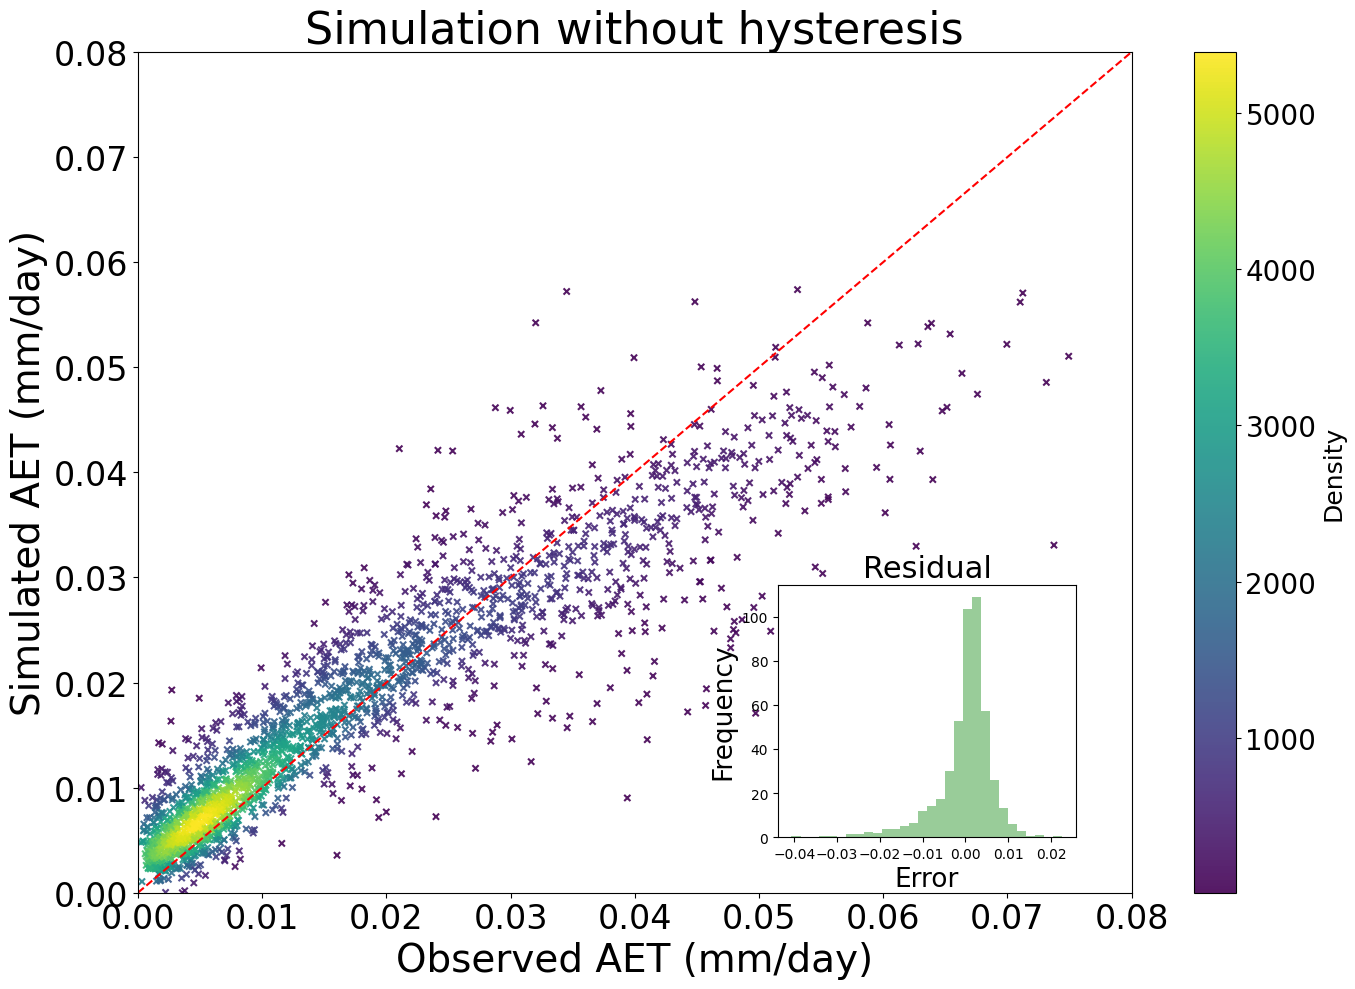

In [15]:
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.metrics import mean_squared_error
from scipy.stats import gaussian_kde, norm
from sklearn.metrics import r2_score

# Assuming the functions nash_sutcliffe_efficiency and the dataframe 'data' are defined elsewhere
# Define the Nash-Sutcliffe Efficiency function
def nash_sutcliffe_efficiency(observed, simulated):
    return 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - np.mean(observed)) ** 2))

# Calculate residuals
data['Residuals'] = data['Simulated AET'] - data['Observed AET']

# Calculate metrics for the plots
#rmse = np.sqrt(mean_squared_error(data['Observed AET'], data['Simulated AET']))
#nse = nash_sutcliffe_efficiency(data['Observed AET'], data['Simulated AET'])
#r2 = r2_score(data['Observed AET'], data['Simulated AET'])

# Calculate point density
xy = np.vstack([data['Observed AET'], data['Simulated AET']])
z = gaussian_kde(xy)(xy)

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Scatter Plot with Density Heatmap
scatter_density = ax.scatter(data['Observed AET'], data['Simulated AET'], c=z, marker='x', cmap='viridis', alpha=0.9, s=20, edgecolor='face')
cbar = fig.colorbar(scatter_density, ax=ax, label='Density')
cbar.ax.set_ylabel('Density', fontsize=18)
cbar.ax.tick_params(labelsize=20)
ax.set_title('Simulation without hysteresis', fontsize=32)
ax.set_xlabel('Observed AET (mm/day)', fontsize=28)
ax.set_ylabel('Simulated AET (mm/day)', fontsize=28)
ax.set_xlim([0, 0.08])
ax.set_ylim([0, 0.08])
ax.tick_params(axis='x', labelsize=24)
ax.tick_params(axis='y', labelsize=24)

# Add 1:1 line
ax.plot([0, 0.9], [0, 0.9], color='red', linestyle='--')

# Histogram of Residuals (inset plot)
inset_hist = inset_axes(ax, width="30%", height="30%", loc='lower right', borderpad=4)
inset_hist.hist(data['Residuals'], bins=30, color='green', alpha=0.4, histtype='barstacked', density=True)

# Calculate the mean and standard deviation of the residuals
#mu, std = norm.fit(data['Residuals'])

# Plot the normal distribution line
#xmin, xmax = inset_hist.get_xlim()
#x = np.linspace(xmin, xmax, 100)
#p = norm.pdf(x, mu, std)
#inset_hist.plot(x, p, 'k', linewidth=2)

inset_hist.set_title('Residual', fontsize=22)
inset_hist.set_xlabel('Error', fontsize=19)
inset_hist.set_ylabel('Frequency', fontsize=19)

# Annotations for NSE, RMSE, R2
#stats_text = f"NSE={nse:.2f}\nRMSE={rmse:.2f}\nR2={r2:.2f}"
#ax.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', verticalalignment='top', bbox=dict(boxstyle="round", fc="white"), fontsize=20)

plt.tight_layout()
plt.show()


In [39]:
import pandas as pd

# Load the data from the Excel file
data = pd.read_excel('D6.xlsx')


# Display the first few rows of the dataset to understand its structure
data.head(), data.columns

(   Simulated SWC  Observed SWC
 0         0.3969      0.369470
 1         0.3870      0.369982
 2         0.3860      0.368849
 3         0.3826      0.369795
 4         0.3779      0.368224,
 Index(['Simulated SWC', 'Observed SWC'], dtype='object'))

<ipython-input-40-ff3e328dbe49>:30: UserWarning: You passed a edgecolor/edgecolors ('face') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_density = ax.scatter(data['Observed SWC'], data['Simulated SWC'], c=z, marker='x', cmap='viridis', alpha=0.9, s=20, edgecolor='face')
<ipython-input-40-ff3e328dbe49>:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


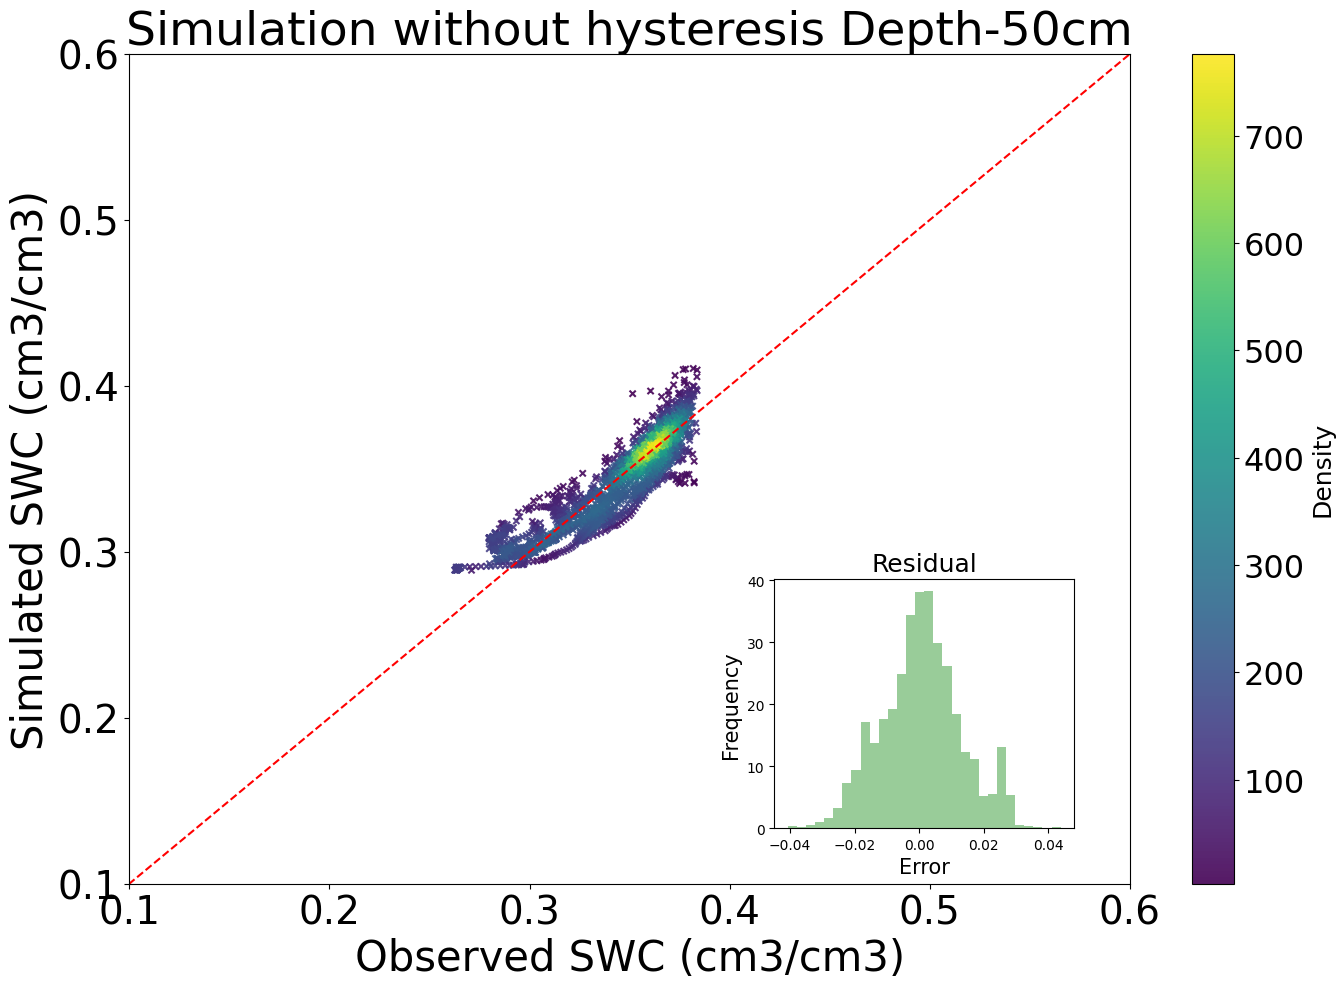

In [40]:
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.metrics import mean_squared_error
from scipy.stats import gaussian_kde, norm

# Assuming the functions nash_sutcliffe_efficiency and the dataframe 'data' are defined elsewhere
# Define the Nash-Sutcliffe Efficiency function
#def nash_sutcliffe_efficiency(observed, simulated):
    #return 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - np.mean(observed)) ** 2))

# Calculate residuals
data['Residuals'] = data['Simulated SWC'] - data['Observed SWC']

# Calculate metrics for the plots
#rmse = np.sqrt(mean_squared_error(data['Observed SWC'], data['Simulated SWC']))
#nse = nash_sutcliffe_efficiency(data['Observed SWC'], data['Simulated SWC'])
#nrmse = rmse / np.mean(data['Observed SWC'])

# Calculate point density
xy = np.vstack([data['Observed SWC'], data['Simulated SWC']])
z = gaussian_kde(xy)(xy)

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Scatter Plot with Density Heatmap
scatter_density = ax.scatter(data['Observed SWC'], data['Simulated SWC'], c=z, marker='x', cmap='viridis', alpha=0.9, s=20, edgecolor='face')
cbar = fig.colorbar(scatter_density, ax=ax, label='Density')
cbar.ax.set_ylabel('Density', fontsize=18)
cbar.ax.tick_params(labelsize=23)
ax.set_title('Simulation without hysteresis Depth-50cm', fontsize=34)
ax.set_xlabel('Observed SWC (cm3/cm3)', fontsize=30)
ax.set_ylabel('Simulated SWC (cm3/cm3)', fontsize=30)
ax.set_xlim([0.1, 0.6])
ax.set_ylim([0.1, 0.6])
ax.tick_params(axis='x', labelsize=28)
ax.tick_params(axis='y', labelsize=28)

# Add 1:1 line
ax.plot([0, 0.9], [0, 0.9], color='red', linestyle='--')

# Histogram of Residuals (inset plot)
inset_hist = inset_axes(ax, width="30%", height="30%", loc='lower right', borderpad=4)
inset_hist.hist(data['Residuals'], bins=30, color='green', alpha=0.4, histtype='barstacked', density=True)

# Calculate the mean and standard deviation of the residuals
#mu, std = norm.fit(data['Residuals'])

# Plot the normal distribution line
#xmin, xmax = inset_hist.get_xlim()
#x = np.linspace(xmin, xmax, 100)
#p = norm.pdf(x, mu, std)
#inset_hist.plot(x, p, 'k', linewidth=2)

inset_hist.set_title('Residual', fontsize=18)
inset_hist.set_xlabel('Error', fontsize=15)
inset_hist.set_ylabel('Frequency', fontsize=15)

# Annotations for NSE, RMSE, NRMSE
#stats_text = f"NSE={nse:.2f}\nRMSE={rmse:.2f}\nNRMSE={nrmse:.2f}"
#ax.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', verticalalignment='top', bbox=dict(boxstyle="round", fc="white"), fontsize=20)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the data from the Excel file
data = pd.read_excel('D3.xlsx')


# Display the first few rows of the dataset to understand its structure
data.head(), data.columns

(   Simulated SWC  Observed SWC
 0         0.3966      0.369470
 1         0.3868      0.369982
 2         0.3859      0.368849
 3         0.3827      0.369795
 4         0.3780      0.368224,
 Index(['Simulated SWC', 'Observed SWC'], dtype='object'))

<ipython-input-63-94e755956dfa>:31: UserWarning: You passed a edgecolor/edgecolors ('face') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_density = ax.scatter(data['Observed SWC'], data['Simulated SWC'], c=z, marker='x', cmap='viridis', alpha=0.7, s=20, edgecolor='face')
<ipython-input-63-94e755956dfa>:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


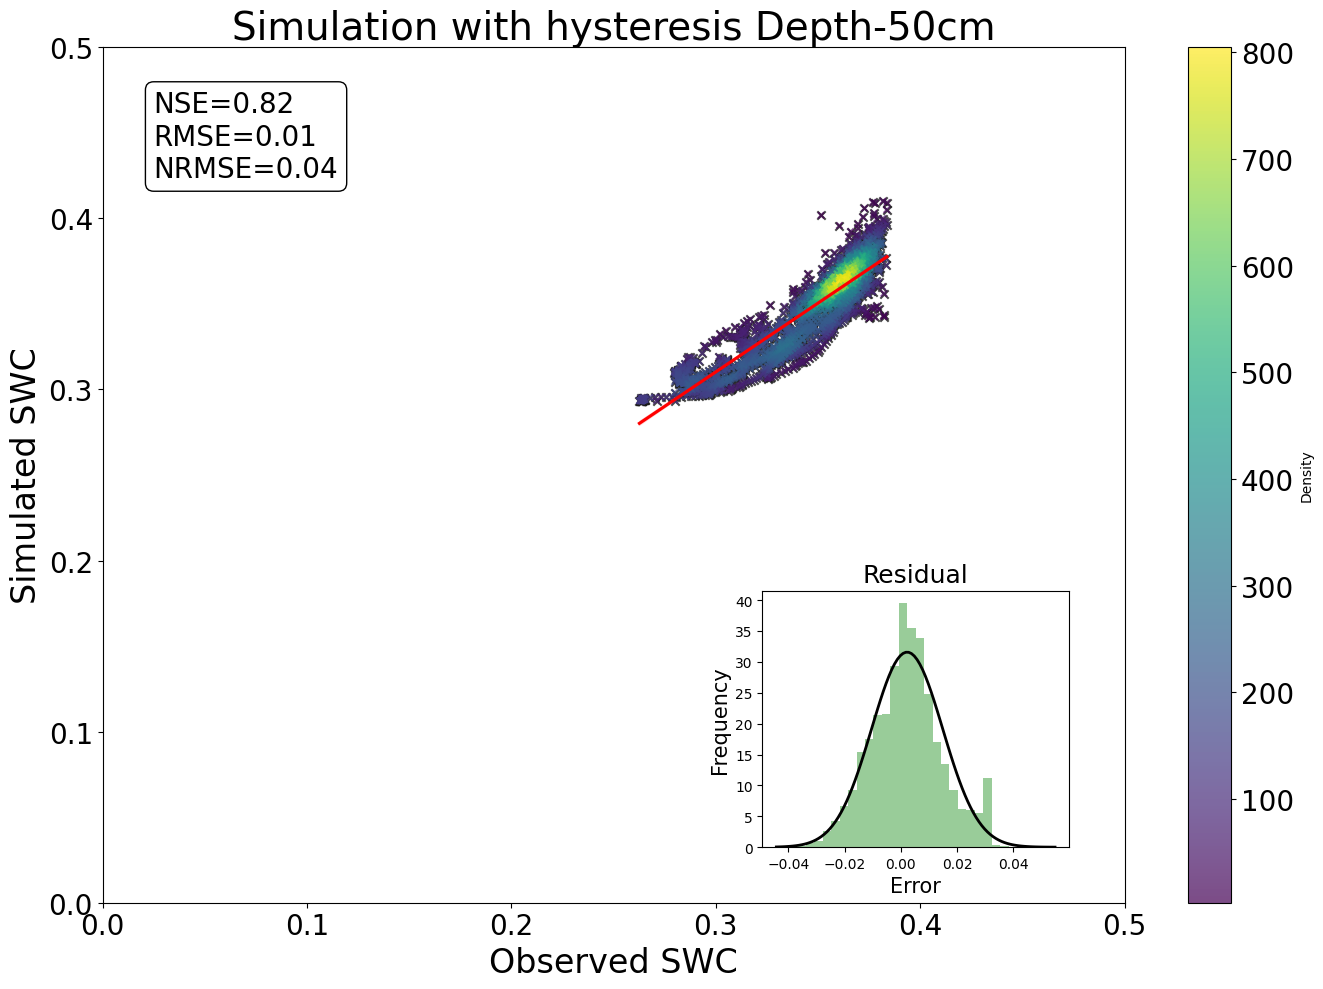

In [ ]:
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.metrics import mean_squared_error
from scipy.stats import gaussian_kde, norm

# Assuming the functions nash_sutcliffe_efficiency and the dataframe 'data' are defined elsewhere
# Define the Nash-Sutcliffe Efficiency function
#def nash_sutcliffe_efficiency(observed, simulated):
    #return 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - np.mean(observed)) ** 2))

# Calculate residuals
data['Residuals'] = data['Simulated SWC'] - data['Observed SWC']

# Calculate metrics for the plots
#rmse = np.sqrt(mean_squared_error(data['Observed SWC'], data['Simulated SWC']))
#nse = nash_sutcliffe_efficiency(data['Observed SWC'], data['Simulated SWC'])
#nrmse = rmse / np.mean(data['Observed SWC'])

# Calculate point density
xy = np.vstack([data['Observed SWC'], data['Simulated SWC']])
z = gaussian_kde(xy)(xy)

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Scatter Plot with Density Heatmap
sns.regplot(x='Observed SWC', y='Simulated SWC', data=data, ax=ax, ci=99, marker="x", color=".1", line_kws=dict(color="r"))
scatter_density = ax.scatter(data['Observed SWC'], data['Simulated SWC'], c=z, marker='x', cmap='viridis', alpha=0.7, s=20, edgecolor='face')
cbar = fig.colorbar(scatter_density, ax=ax, label='Density')
cbar.ax.tick_params(labelsize=20)
ax.set_title('Simulation with hysteresis Depth-50cm', fontsize=34)
ax.set_xlabel('Observed SWC (cm^3/cm^3)', fontsize=30)
ax.set_ylabel('Simulated SWC(cm^3/cm^3)', fontsize=30)
ax.set_xlim([0, 0.5])
ax.set_ylim([0, 0.5])
ax.tick_params(axis='x', labelsize=25)
ax.tick_params(axis='y', labelsize=25)

# Histogram of Residuals (inset plot)
inset_hist = inset_axes(ax, width="30%", height="30%", loc='lower right', borderpad=4)
inset_hist.hist(data['Residuals'], bins=30, color='green', alpha=0.4, histtype='barstacked', density=True)

# Calculate the mean and standard deviation of the residuals
mu, std = norm.fit(data['Residuals'])

# Plot the normal distribution line
xmin, xmax = inset_hist.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
inset_hist.plot(x, p, 'k', linewidth=2)

inset_hist.set_title('Residual', fontsize=18)
inset_hist.set_xlabel('Error', fontsize=15)
inset_hist.set_ylabel('Frequency', fontsize=15)

# Annotations for NSE, RMSE, NRMSE
#stats_text = f"NSE={nse:.2f}\nRMSE={rmse:.2f}\nNRMSE={nrmse:.2f}"
#ax.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', verticalalignment='top', bbox=dict(boxstyle="round", fc="white"), fontsize=20)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the data from the Excel file
data = pd.read_excel('D4.xlsx')


# Display the first few rows of the dataset to understand its structure
data.head(), data.columns

(   Simulated SWC  Observed SWC
 0         0.4916      0.450813
 1         0.4712      0.444242
 2         0.4718      0.441093
 3         0.4643      0.441588
 4         0.4549      0.438442,
 Index(['Simulated SWC', 'Observed SWC'], dtype='object'))

<ipython-input-67-f15e95443b3d>:31: UserWarning: You passed a edgecolor/edgecolors ('face') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_density = ax.scatter(data['Observed SWC'], data['Simulated SWC'], c=z, marker='x', cmap='viridis', alpha=0.7, s=20, edgecolor='face')
<ipython-input-67-f15e95443b3d>:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


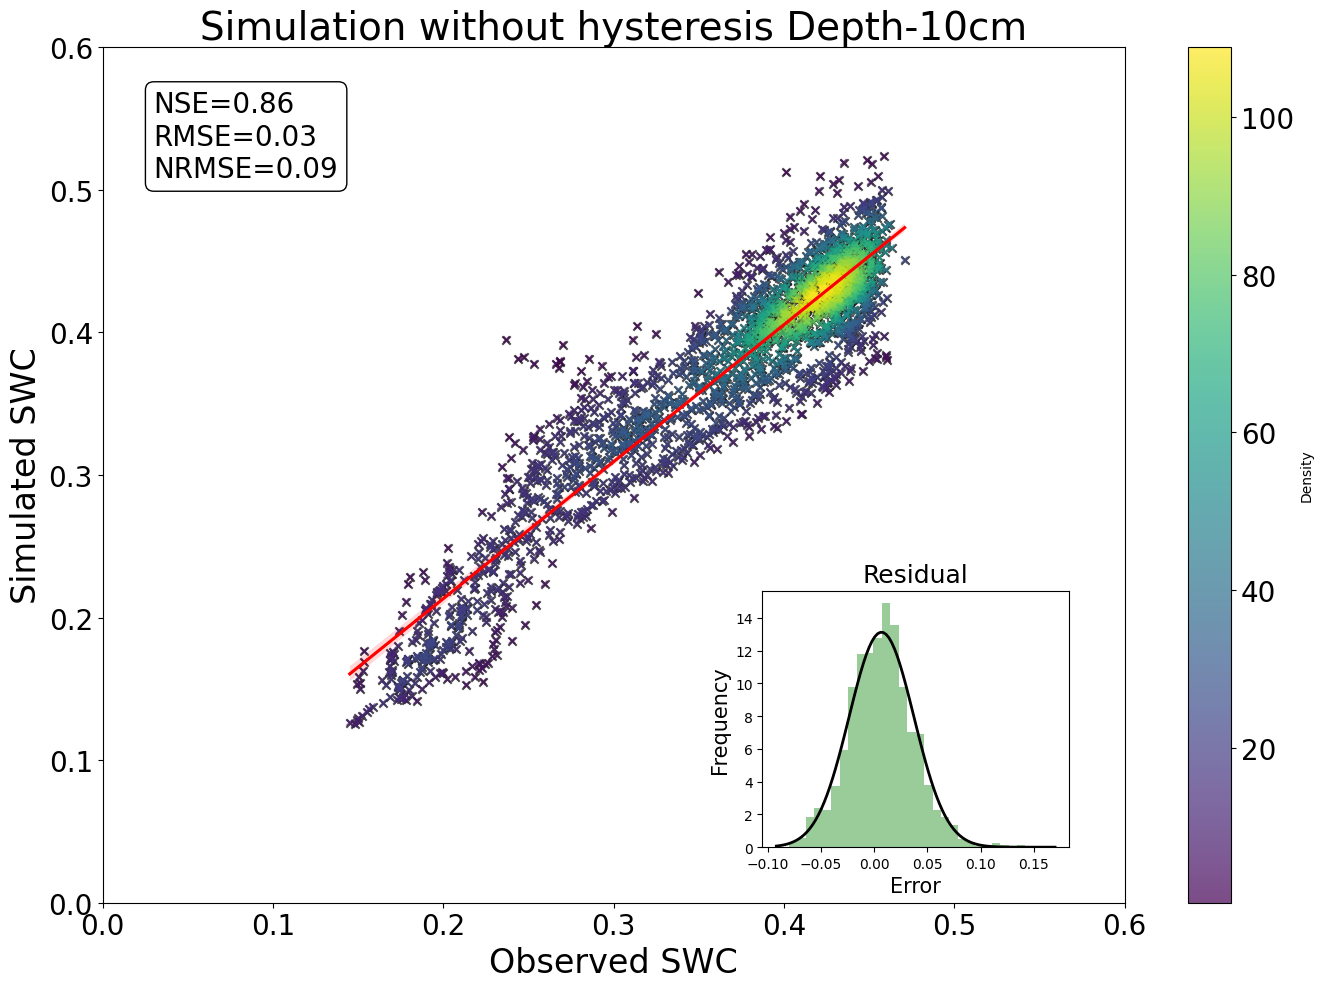

In [ ]:
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.metrics import mean_squared_error
from scipy.stats import gaussian_kde, norm

# Assuming the functions nash_sutcliffe_efficiency and the dataframe 'data' are defined elsewhere
# Define the Nash-Sutcliffe Efficiency function
def nash_sutcliffe_efficiency(observed, simulated):
    return 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - np.mean(observed)) ** 2))

# Calculate residuals
data['Residuals'] = data['Simulated SWC'] - data['Observed SWC']

# Calculate metrics for the plots
rmse = np.sqrt(mean_squared_error(data['Observed SWC'], data['Simulated SWC']))
nse = nash_sutcliffe_efficiency(data['Observed SWC'], data['Simulated SWC'])
nrmse = rmse / np.mean(data['Observed SWC'])

# Calculate point density
xy = np.vstack([data['Observed SWC'], data['Simulated SWC']])
z = gaussian_kde(xy)(xy)

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Scatter Plot with Density Heatmap
sns.regplot(x='Observed SWC', y='Simulated SWC', data=data, ax=ax, ci=99, marker="x", color=".1", line_kws=dict(color="r"))
scatter_density = ax.scatter(data['Observed SWC'], data['Simulated SWC'], c=z, marker='x', cmap='viridis', alpha=0.7, s=20, edgecolor='face')
cbar = fig.colorbar(scatter_density, ax=ax, label='Density')
cbar.ax.tick_params(labelsize=20)
ax.set_title('Simulation without hysteresis Depth-10cm', fontsize=28)
ax.set_xlabel('Observed SWC', fontsize=24)
ax.set_ylabel('Simulated SWC', fontsize=24)
ax.set_xlim([0, 0.6])
ax.set_ylim([0, 0.6])
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Histogram of Residuals (inset plot)
inset_hist = inset_axes(ax, width="30%", height="30%", loc='lower right', borderpad=4)
inset_hist.hist(data['Residuals'], bins=30, color='green', alpha=0.4, histtype='barstacked', density=True)

# Calculate the mean and standard deviation of the residuals
mu, std = norm.fit(data['Residuals'])

# Plot the normal distribution line
xmin, xmax = inset_hist.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
inset_hist.plot(x, p, 'k', linewidth=2)

inset_hist.set_title('Residual', fontsize=18)
inset_hist.set_xlabel('Error', fontsize=15)
inset_hist.set_ylabel('Frequency', fontsize=15)

# Annotations for NSE, RMSE, NRMSE
stats_text = f"NSE={nse:.2f}\nRMSE={rmse:.2f}\nNRMSE={nrmse:.2f}"
ax.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', verticalalignment='top', bbox=dict(boxstyle="round", fc="white"), fontsize=20)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the data from the Excel file
data = pd.read_excel('D5.xlsx')


# Display the first few rows of the dataset to understand its structure
data.head(), data.columns

(   Simulated SWC  Observed SWC
 0         0.4242      0.399929
 1         0.4202      0.397034
 2         0.4200      0.394940
 3         0.4182      0.394967
 4         0.4157      0.392554,
 Index(['Simulated SWC', 'Observed SWC'], dtype='object'))

<ipython-input-70-4bee3d405b47>:31: UserWarning: You passed a edgecolor/edgecolors ('face') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_density = ax.scatter(data['Observed SWC'], data['Simulated SWC'], c=z, marker='x', cmap='viridis', alpha=0.7, s=20, edgecolor='face')
<ipython-input-70-4bee3d405b47>:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


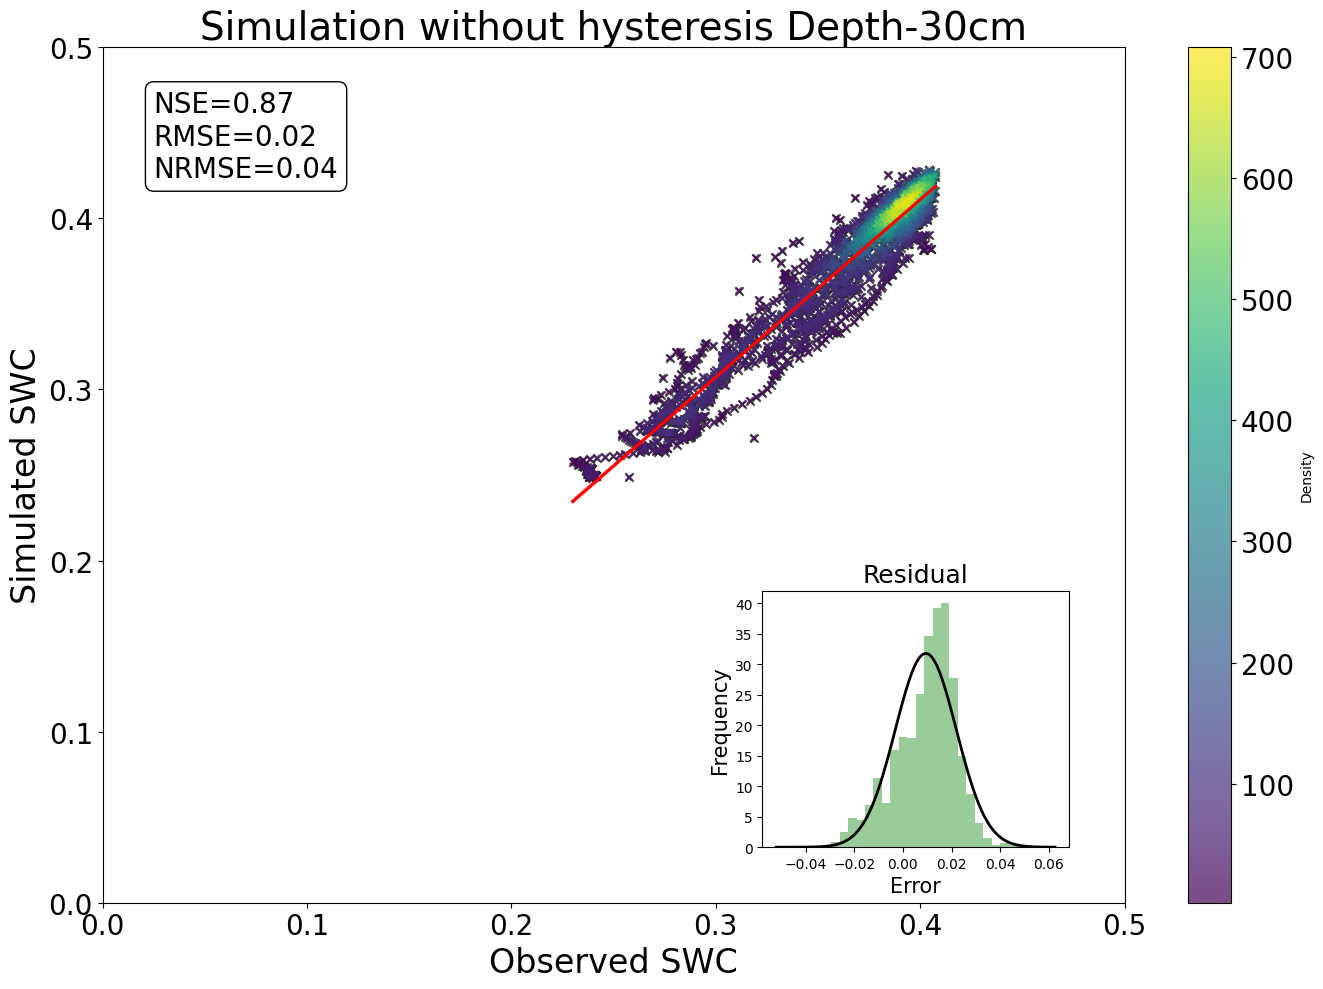

In [ ]:
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.metrics import mean_squared_error
from scipy.stats import gaussian_kde, norm

# Assuming the functions nash_sutcliffe_efficiency and the dataframe 'data' are defined elsewhere
# Define the Nash-Sutcliffe Efficiency function
def nash_sutcliffe_efficiency(observed, simulated):
    return 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - np.mean(observed)) ** 2))

# Calculate residuals
data['Residuals'] = data['Simulated SWC'] - data['Observed SWC']

# Calculate metrics for the plots
rmse = np.sqrt(mean_squared_error(data['Observed SWC'], data['Simulated SWC']))
nse = nash_sutcliffe_efficiency(data['Observed SWC'], data['Simulated SWC'])
nrmse = rmse / np.mean(data['Observed SWC'])

# Calculate point density
xy = np.vstack([data['Observed SWC'], data['Simulated SWC']])
z = gaussian_kde(xy)(xy)

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Scatter Plot with Density Heatmap
sns.regplot(x='Observed SWC', y='Simulated SWC', data=data, ax=ax, ci=99, marker="x", color=".1", line_kws=dict(color="r"))
scatter_density = ax.scatter(data['Observed SWC'], data['Simulated SWC'], c=z, marker='x', cmap='viridis', alpha=0.7, s=20, edgecolor='face')
cbar = fig.colorbar(scatter_density, ax=ax, label='Density')
cbar.ax.tick_params(labelsize=20)
ax.set_title('Simulation without hysteresis Depth-30cm', fontsize=28)
ax.set_xlabel('Observed SWC', fontsize=24)
ax.set_ylabel('Simulated SWC', fontsize=24)
ax.set_xlim([0, 0.5])
ax.set_ylim([0, 0.5])
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Histogram of Residuals (inset plot)
inset_hist = inset_axes(ax, width="30%", height="30%", loc='lower right', borderpad=4)
inset_hist.hist(data['Residuals'], bins=30, color='green', alpha=0.4, histtype='barstacked', density=True)

# Calculate the mean and standard deviation of the residuals
mu, std = norm.fit(data['Residuals'])

# Plot the normal distribution line
xmin, xmax = inset_hist.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
inset_hist.plot(x, p, 'k', linewidth=2)

inset_hist.set_title('Residual', fontsize=18)
inset_hist.set_xlabel('Error', fontsize=15)
inset_hist.set_ylabel('Frequency', fontsize=15)

# Annotations for NSE, RMSE, NRMSE
stats_text = f"NSE={nse:.2f}\nRMSE={rmse:.2f}\nNRMSE={nrmse:.2f}"
ax.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', verticalalignment='top', bbox=dict(boxstyle="round", fc="white"), fontsize=20)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load the data from the Excel file
data = pd.read_excel('D6.xlsx')


# Display the first few rows of the dataset to understand its structure
data.head(), data.columns

(   Simulated SWC  Observed SWC
 0         0.3969      0.369470
 1         0.3870      0.369982
 2         0.3860      0.368849
 3         0.3826      0.369795
 4         0.3779      0.368224,
 Index(['Simulated SWC', 'Observed SWC'], dtype='object'))

<ipython-input-72-2395a08ab297>:31: UserWarning: You passed a edgecolor/edgecolors ('face') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  scatter_density = ax.scatter(data['Observed SWC'], data['Simulated SWC'], c=z, marker='x', cmap='viridis', alpha=0.7, s=20, edgecolor='face')
<ipython-input-72-2395a08ab297>:63: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


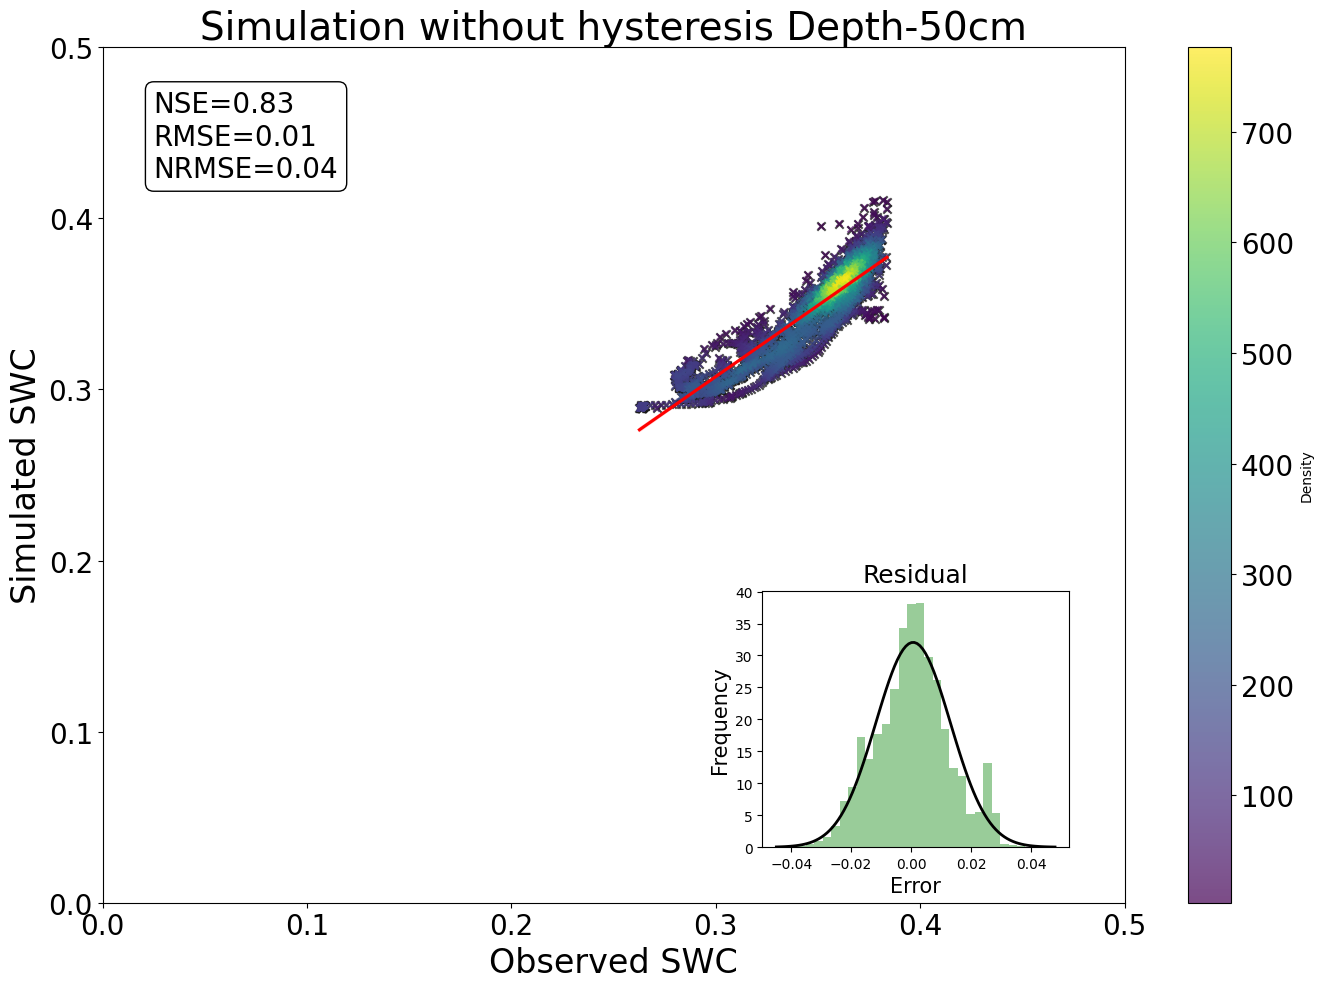

In [ ]:
import matplotlib.gridspec as gridspec
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from sklearn.metrics import mean_squared_error
from scipy.stats import gaussian_kde, norm

# Assuming the functions nash_sutcliffe_efficiency and the dataframe 'data' are defined elsewhere
# Define the Nash-Sutcliffe Efficiency function
def nash_sutcliffe_efficiency(observed, simulated):
    return 1 - (np.sum((observed - simulated) ** 2) / np.sum((observed - np.mean(observed)) ** 2))

# Calculate residuals
data['Residuals'] = data['Simulated SWC'] - data['Observed SWC']

# Calculate metrics for the plots
rmse = np.sqrt(mean_squared_error(data['Observed SWC'], data['Simulated SWC']))
nse = nash_sutcliffe_efficiency(data['Observed SWC'], data['Simulated SWC'])
nrmse = rmse / np.mean(data['Observed SWC'])

# Calculate point density
xy = np.vstack([data['Observed SWC'], data['Simulated SWC']])
z = gaussian_kde(xy)(xy)

# Set up the plot
fig, ax = plt.subplots(figsize=(14, 10))

# Scatter Plot with Density Heatmap
sns.regplot(x='Observed SWC', y='Simulated SWC', data=data, ax=ax, ci=99, marker="x", color=".1", line_kws=dict(color="r"))
scatter_density = ax.scatter(data['Observed SWC'], data['Simulated SWC'], c=z, marker='x', cmap='viridis', alpha=0.7, s=20, edgecolor='face')
cbar = fig.colorbar(scatter_density, ax=ax, label='Density')
cbar.ax.tick_params(labelsize=20)
ax.set_title('Simulation without hysteresis Depth-50cm', fontsize=28)
ax.set_xlabel('Observed SWC', fontsize=24)
ax.set_ylabel('Simulated SWC', fontsize=24)
ax.set_xlim([0, 0.5])
ax.set_ylim([0, 0.5])
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)

# Histogram of Residuals (inset plot)
inset_hist = inset_axes(ax, width="30%", height="30%", loc='lower right', borderpad=4)
inset_hist.hist(data['Residuals'], bins=30, color='green', alpha=0.4, histtype='barstacked', density=True)

# Calculate the mean and standard deviation of the residuals
mu, std = norm.fit(data['Residuals'])

# Plot the normal distribution line
xmin, xmax = inset_hist.get_xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
inset_hist.plot(x, p, 'k', linewidth=2)

inset_hist.set_title('Residual', fontsize=18)
inset_hist.set_xlabel('Error', fontsize=15)
inset_hist.set_ylabel('Frequency', fontsize=15)

# Annotations for NSE, RMSE, NRMSE
stats_text = f"NSE={nse:.2f}\nRMSE={rmse:.2f}\nNRMSE={nrmse:.2f}"
ax.annotate(stats_text, xy=(0.05, 0.95), xycoords='axes fraction', verticalalignment='top', bbox=dict(boxstyle="round", fc="white"), fontsize=20)

plt.tight_layout()
plt.show()
